<a href="https://colab.research.google.com/github/Ka275578/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_fifth_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name - NYC Taxi Trip Time Prediction</u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Kumar Anand
##### **email** - ka275578@gmail.com 

# **Project Summary -**

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, we have to predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - contains 1458644 trip records and 11 Data fields.

### New York City is well known for traffic jams which happens due to roadworks, street closures or various other reason.
### Due to this high congestion on the roads it has become very much important to know the trip duration before starting any trip.
### In this project we will be developing various machine learning regression models which will predict the trip timing based on the given dataset.
### ML models used for this project and the respective hyperparametes used - 
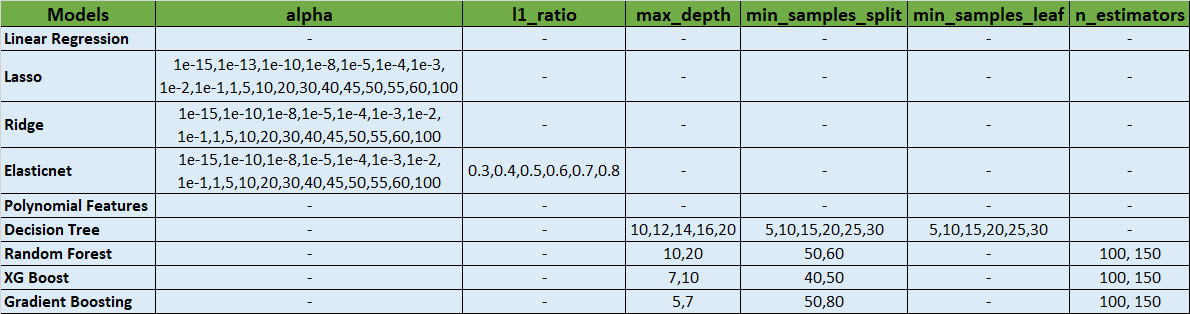
### Predictions made through these models will give the person taking ride a prior estimation of the trip timings so that he/she can plan their work accordingly.


### Following are the metrics we got for various ML models on the test set -
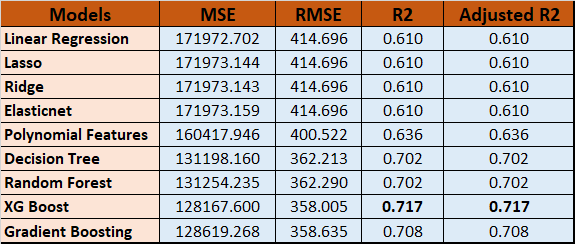
### Prediction made by XG Boost Regressor is best with R2 and adjusted R2 of 0.717.

# **GitHub Link -**

https://github.com/Ka275578/NYC-Taxi-Trip-Time-Prediction

# **Problem Statement**

* Now a days there is sudden increase in the popularity of app based taxi service providers like Uber, Curb, Lyft etc. in the NYC. So, it has become very much important for these companies to predict the ride timings more accurately before start of any trip.
* Knowing the trip duration beforehand will help the rider in planning their day accordingly.
* Also, for people taking taxis for going to office, knowing trip duration is very much important so that they can leave on proper time from their home.
* So, it has become extremely important to predict the trip duration accurately which depend on several parameters like trip distance, start time, pickup location, drop location etc.
* As trip duration depends on a lot of parameters, so the best way to predict the trip duration is with the help of some historical dataset (in this case NYC taxi dataset) by employing machine learning models.
* Our main goal is to build a model that predicts the total ride duration of taxi trips from New York City Taxi and Limousine Commission (TLC) dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Start !***

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math

from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

###Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
nyc_taxi_dataset = pd.read_csv('/content/mydrive/MyDrive/NYC-Taxi-Trip-Time-Prediction_Kumar_Anand/NYC Taxi Data.csv')

### Dataset Rows & Columns count

### Dataset First View

In [4]:
#Let's have a look on dataset
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
nyc_taxi_dataset.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [6]:
nyc_taxi_dataset.shape

(1458644, 11)

There are total 1458644 entries and 11 features in the dataset. Lets explore more to know the type of features.

### Dataset Information

In [7]:
#checking the info of dataset
nyc_taxi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Checking duplicate Values

In [8]:
#Checking the unique values in the dataset
nyc_taxi_dataset.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique entries in column 'id' which is same as number of rows in the dataset. So, there is no duplicate entries in the dataset.

#### Missing Values/Null Values

In [9]:
nyc_taxi_dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We can see that there is no null values in the dataset

### Initial insights on the dataset -

The dataset is based on the 2016 NYC Yellow Cab trip record.

####Following are the dependent and independent variables -
####Independent Variables - 
*id, 
vendor_id, 
pickup_datetime, 
dropoff_datetime, 
passenger_count, 
pickup_longitude, 
pickup_latitude, 
dropoff_longitude, 
dropoff_latitude, 
store_and_fwd_flag*

####Dependent / Target Variable -
trip_duration

Our goal is to predict the Target Varible trip_duration by employing various machine learning regression models.

This dataset doesn't have any duplicate or null values.

## ***Understanding Variables***

In [10]:
#to see column names
nyc_taxi_dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### Variables Description 

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

In [11]:
#to check data types of features
nyc_taxi_dataset.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* id, pickup_datetime, dropoff_datetime, store_and_fwd_flag are of object dtype.
* vendor_id, passenger_count and trip_duration are of int dtype.
* pickup_longitude, pickup_lattitude, dropoff_longitude and dropoff_lattitude are of float dtype.

In [12]:
#Describing the dataset
nyc_taxi_dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From the above description we infer that - 

The min passenger_count in the dataset is 0 which is not possible so this might be the error in recording the data or the driver might have entered wrongly the number of passengers to increase the trip counts so, we will drop the readings where passenger count is 0. 

##***Data Wrangling, Data Visualization and Feature Engineering***

### **Univariate Analysis**

In [19]:
#Dropping the rows where passenger_count is 0.
nyc_taxi_dataset = nyc_taxi_dataset[nyc_taxi_dataset['passenger_count']!=0]
nyc_taxi_dataset.shape

(1458579, 11)

In the passenger_count the maximum entry is 9 which also doesn't seems correct. 

In [18]:
nyc_taxi_dataset['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404


<AxesSubplot:xlabel='passenger_count'>

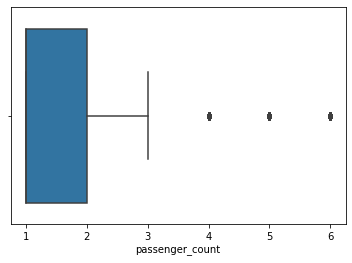

In [20]:
#Plotting boxplot for passenger_count to check the outliers.
sns.boxplot(nyc_taxi_dataset['passenger_count'])


In the column passenger_count for number of passengers 7, 8 & 9 there are only 3, 1 & 1 entries respectively which is very less compared to passenger_count for other trips. Also, in traditional taxi maximum of 6 passengers (if it is a SUV) are allowed So, we will drop these outliers.

In [21]:
#Dropping the rows where passenger_count more than 6.
nyc_taxi_dataset = nyc_taxi_dataset[nyc_taxi_dataset['passenger_count']<7]
nyc_taxi_dataset.shape

(1458579, 11)

In [23]:
nyc_taxi_dataset['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404


<AxesSubplot:xlabel='passenger_count'>

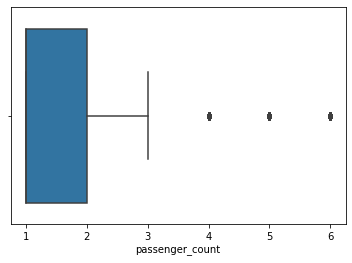

In [22]:
#Plotting boxplot again after removing the outliers for passenger count.
sns.boxplot(nyc_taxi_dataset['passenger_count'])

After dropping the passenger_count 7, 8 & 9 we are now only left with passenger count 4, 5 & 6 which are showing as outlier in the box plot but we will not be removing them as these values are possible values for passenger_count.

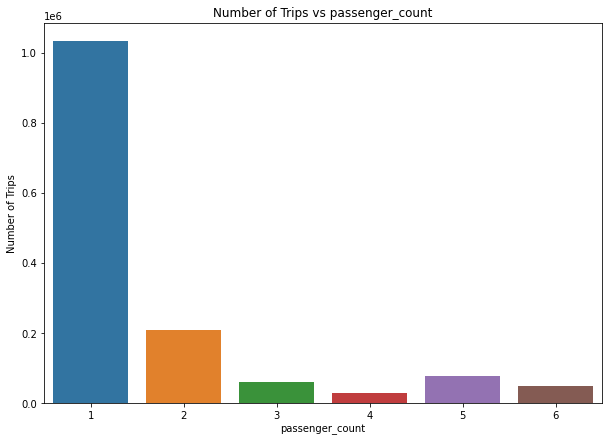

In [24]:
#Plotting Number of Trips vs passenger_count.
plt.figure(figsize=(10,7))
plt.title("Number of Trips vs passenger_count")
sns.countplot(x = 'passenger_count', data = nyc_taxi_dataset)
plt.xlabel("passenger_count")
plt.ylabel("Number of Trips")
plt.show()

countplot gives the better visualization for the observational counts in different category-based bins using bars.From the above graph we infer that most of the people prefer to go solo.

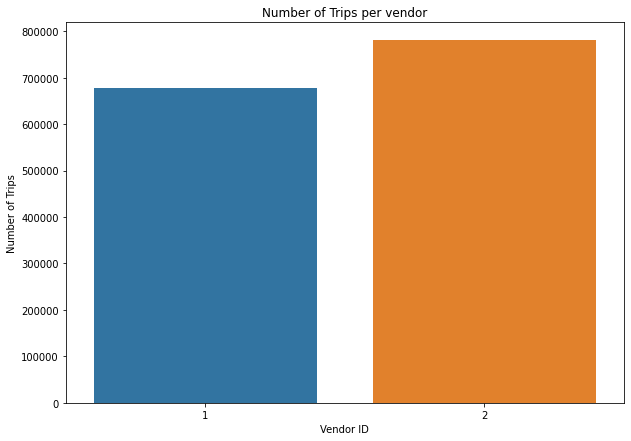

In [25]:
#Plotting countplot for vendor_id.
plt.figure(figsize=(10,7))
plt.title("Number of Trips per vendor")
sns.countplot(x = 'vendor_id', data = nyc_taxi_dataset)
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.show()

countplot gives the better visualization of how the observational data is spread between vendor 1 & 2. Trips taken by the vendor 2 is more than vendor 1.

In [26]:
#convert datatype to datetime for pick-up and drop time
nyc_taxi_dataset['pickup_datetime'] = pd.to_datetime(nyc_taxi_dataset['pickup_datetime'])
nyc_taxi_dataset['dropoff_datetime'] = pd.to_datetime(nyc_taxi_dataset['dropoff_datetime'])

In [27]:
#Extracting day from given dates
nyc_taxi_dataset['pickup_day'] = nyc_taxi_dataset['pickup_datetime'].dt.day_name()
nyc_taxi_dataset['dropoff_day'] = nyc_taxi_dataset['dropoff_datetime'].dt.day_name()
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Text(0, 0.5, 'count')

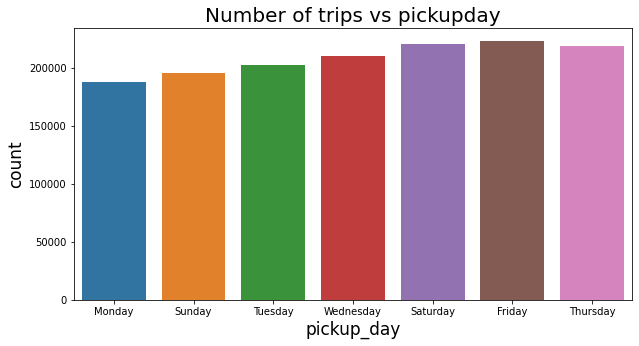

In [28]:
#sns.countplot(x= 'pickup_day',data=nyc_taxi_dataset, palette = "Set1")
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "pickup_day", data = nyc_taxi_dataset)
ax.set_title("Number of trips vs pickupday", fontsize = 20)
plt.xlabel("pickup_day",fontsize=17)
plt.ylabel("count", fontsize=17)


Text(0, 0.5, 'count')

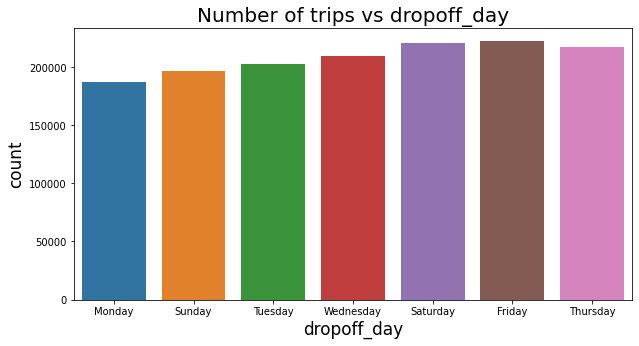

In [29]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "dropoff_day", data = nyc_taxi_dataset)
ax.set_title("Number of trips vs dropoff_day", fontsize = 20)
plt.xlabel("dropoff_day",fontsize=17)
plt.ylabel("count", fontsize=17)

Countplot gives a better visuallization for the spread of observational data between each week day for pickup and drop. From the above graph we can infer that most of the trips are done on Friday and Saturday. On weekends people prefer to go more on trips.

In [30]:
nyc_taxi_dataset['pickup_hour'] = nyc_taxi_dataset['pickup_datetime'].dt.hour
nyc_taxi_dataset['dropoff_hour'] = nyc_taxi_dataset['dropoff_datetime'].dt.hour
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13


Text(0, 0.5, 'count')

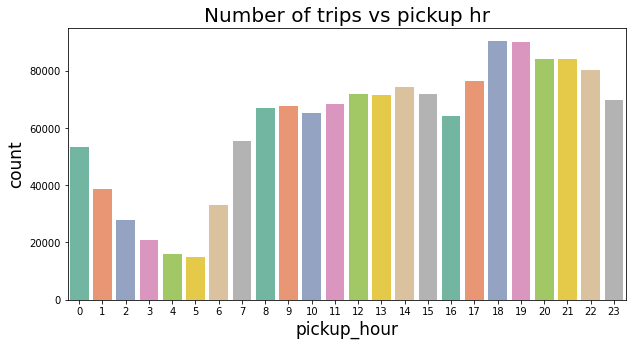

In [31]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "pickup_hour", data = nyc_taxi_dataset, palette='Set2')
ax.set_title("Number of trips vs pickup hr", fontsize = 20)
plt.xlabel("pickup_hour",fontsize=17)
plt.ylabel("count", fontsize=17)

Text(0, 0.5, 'count')

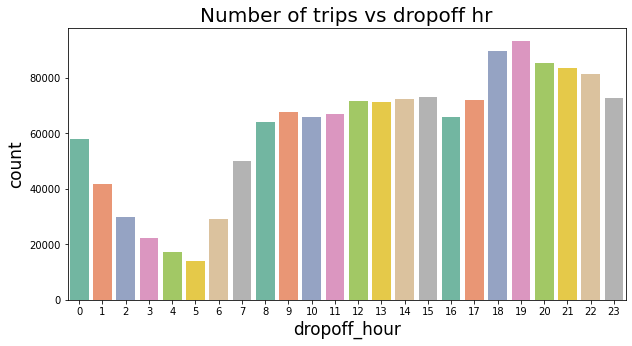

In [32]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "dropoff_hour", data = nyc_taxi_dataset, palette='Set2')
ax.set_title("Number of trips vs dropoff hr", fontsize = 20)
plt.xlabel("dropoff_hour",fontsize=17)
plt.ylabel("count", fontsize=17)

The above graph shows that most of the trips are done between 6:00 PM to 7:00 PM, reason might be this is the time when people will leave from offices and they are taking cab on their way back home or on Friday since we saw is the busiest day we can infer that most of the people are going for trips after office on Friday.

In [33]:
def time_of_day(hr):
  ''' This function extracts the time_of_day like Morning, Afternoon, Evening
    and Night from hrs. Pass hr in 24hr format to this function'''
  if hr >= 6 and hr < 12:
    return 'Morning'
  if hr>=12 and hr <17:
    return 'Afternoon'
  if hr >= 17 and hr < 22:
    return 'Evening'
  else:
    return 'Night'

In [34]:
#extracting at which time of the day (Morning, Afternoon, Evening or Night) trips are done.
nyc_taxi_dataset['pickup_timeofday'] = nyc_taxi_dataset['pickup_hour'].apply(time_of_day)
nyc_taxi_dataset['dropoff_timeofday'] = nyc_taxi_dataset['dropoff_hour'].apply(time_of_day)


Text(0, 0.5, 'count')

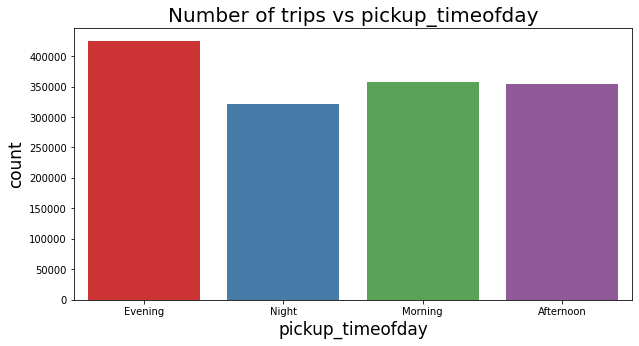

In [35]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "pickup_timeofday", data = nyc_taxi_dataset, palette='Set1')
ax.set_title("Number of trips vs pickup_timeofday", fontsize = 20)
plt.xlabel("pickup_timeofday",fontsize=17)
plt.ylabel("count", fontsize=17)

Text(0, 0.5, 'count')

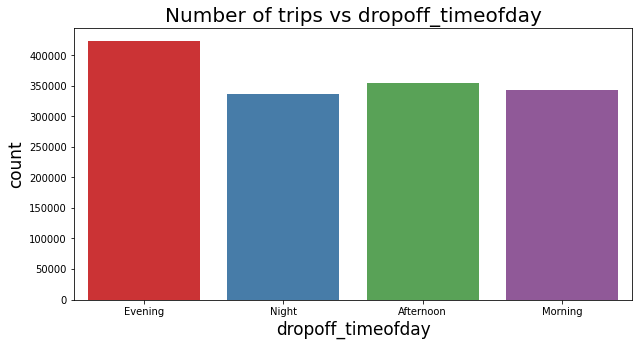

In [36]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "dropoff_timeofday", data = nyc_taxi_dataset, palette='Set1')
ax.set_title("Number of trips vs dropoff_timeofday", fontsize = 20)
plt.xlabel("dropoff_timeofday",fontsize=17)
plt.ylabel("count", fontsize=17)

countplot gives a better visuallization for the spread of observational data between for different time (like Morning, Afternoon, Evening, Night) of the day for pickup and drop. Above graph shows that most of the trips are taken in the evening we found the same thing in the previous graph that most of the trips are between 6:00 PM to 7:00 PM.

In [37]:
#Extracting trip_month from datetime to visualize which month there was more trips.
nyc_taxi_dataset['month'] = nyc_taxi_dataset['pickup_datetime'].dt.month

In [38]:
def month(month):
  ''' This function extracts the name of month'''
  Months = ['January','February','March', 'April', 'May', 'June', 'July','August', 'September', 'October','November','December']
  return Months[month-1]
  

In [39]:
nyc_taxi_dataset['trip_month']= nyc_taxi_dataset['month'].apply(month)

Text(0, 0.5, 'count')

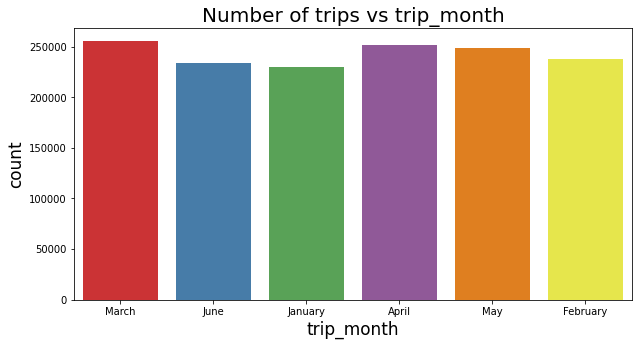

In [40]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "trip_month", data = nyc_taxi_dataset, palette='Set1')
ax.set_title("Number of trips vs trip_month", fontsize = 20)
plt.xlabel("trip_month",fontsize=17)
plt.ylabel("count", fontsize=17)

The above countplot gives a good visuallization for the spread of observational data between each month of the trip done.Number of trips are not varying much if we observe month wise. Also, since we have data only for the six month so, it will not be a good idea to include trip_month in the model reason being if any date comes which is between July to December the model will not work properly. So, lets drop this column.

In [41]:
#Dropping the trip month column.
nyc_taxi_dataset.drop(['month','trip_month'], axis = 1, inplace = True)

In [42]:
def get_distance_km(lat_1, lon_1, lat_2, lon_2):
  '''This fucntion converts the given latitude and longitude into distance in km.
    pass the latitude and longitude of pickup and drop location as argument 
    to this function in the sequence of 
    (pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)'''
  cord_1 = (lat_1, lon_1)
  cord_2 = (lat_2, lon_2)
  return geodesic(cord_1, cord_2).km

In [43]:
nyc_taxi_dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_hour',
       'dropoff_hour', 'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')

In [44]:
nyc_taxi_dataset['distance'] = nyc_taxi_dataset.apply(lambda x: get_distance_km(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [45]:
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,Evening,Evening,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,Night,Night,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,Morning,Afternoon,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,Evening,Evening,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,Afternoon,Afternoon,1.187038


<AxesSubplot:xlabel='distance'>

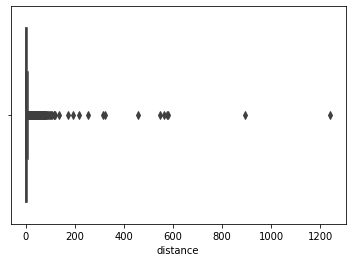

In [46]:
#Plotting boxplot for distance column.
sns.boxplot(nyc_taxi_dataset['distance'])

From this box plot we can see that there are some trips with more than 200kms distance travelled. We can not direclty delete these data as these might be the long trips people take for vacation or on weekends.

In [47]:
# Exploring the distance feature.
nyc_taxi_dataset['distance'].value_counts()

0.000000     5887
2.064458        2
0.942752        2
0.000644        2
1.289928        2
             ... 
2.817283        1
26.281212       1
2.252518        1
2.133112        1
1.133655        1
Name: distance, Length: 1452682, dtype: int64

From the above data we can infer that there are 5887 entries with 0.0km distance which is again not a correct entry. We have to deep dive in this column to check why the distance covered is 0.0km.

In [49]:
nyc_taxi_dataset[nyc_taxi_dataset['distance']==0.0].head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,Monday,18,18,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,Tuesday,18,18,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,Monday,23,23,Night,Night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,Monday,19,19,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,Wednesday,Wednesday,22,22,Night,Night,0.0
1728,id2134482,1,2016-01-22 16:13:01,2016-01-22 16:13:20,1,-73.776314,40.645454,-73.776314,40.645454,N,19,Friday,Friday,16,16,Afternoon,Afternoon,0.0
1769,id2892749,1,2016-01-18 15:24:43,2016-01-18 15:28:57,5,-73.954666,40.821003,-73.954666,40.821003,Y,254,Monday,Monday,15,15,Afternoon,Afternoon,0.0
2087,id0931199,2,2016-05-04 22:28:43,2016-05-04 22:32:51,1,-73.954628,40.777180,-73.954628,40.777180,N,248,Wednesday,Wednesday,22,22,Night,Night,0.0
2441,id2251007,2,2016-05-23 14:20:49,2016-05-23 14:20:57,1,-73.781830,40.644699,-73.781830,40.644699,N,8,Monday,Monday,14,14,Afternoon,Afternoon,0.0
2609,id1992673,2,2016-03-02 20:10:41,2016-03-02 20:30:53,5,-73.875313,40.773682,-73.875313,40.773682,N,1212,Wednesday,Wednesday,20,20,Evening,Evening,0.0


From the above data we can infer that for some of the entries trip_duration is more than 1000s still the distance is 0.0km. We will deep dive more for these data in bivariate analysis when we will be comparing the distance with trip_duration.

#### **Exploring the column trip duration.**

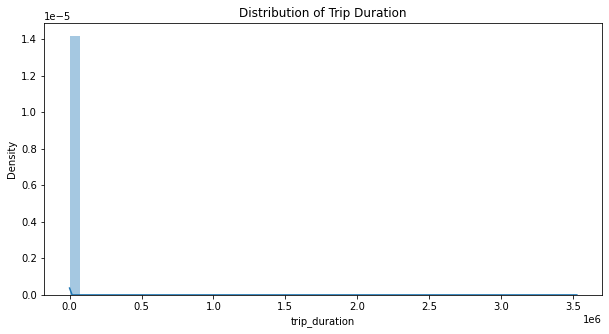

In [51]:
#Plotting distribution of target variable trip_duration.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(nyc_taxi_dataset['trip_duration'])
plt.show()

Distribution plots are very much useful in showing the skewness of the data.


From the above graph we can easily infer that there are some outliers because of which the graph is highly skewed. The same thing can be seen from boxplot.

<AxesSubplot:xlabel='trip_duration'>

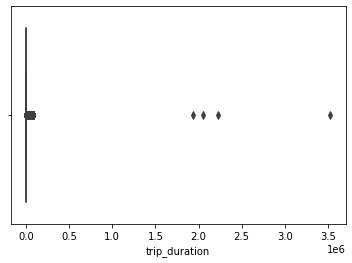

In [53]:
#Plotting boxplot for trip_duration
sns.boxplot(nyc_taxi_dataset['trip_duration'])

In [61]:
#Look for outlier in the trip_duration column.
nyc_taxi_dataset.sort_values(by = 'trip_duration', ascending = False).head(6)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,Saturday,Friday,22,18,Night,Evening,19.926608
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,Tuesday,Sunday,6,1,Morning,Night,1.633027
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,Saturday,Tuesday,22,15,Night,Afternoon,5.992874
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,Tuesday,Wednesday,0,11,Night,Morning,20.160235
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,Monday,Tuesday,23,23,Night,Night,20.666941
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,Tuesday,Wednesday,13,13,Afternoon,Afternoon,21.147722


After sorting out the dataset with respect to trip_duration in descending order we found out that the longest trip durations 3526282s(979hr), 2227612s(618hr), 2049578s(569.3hr) and 1939736s(538.8hr) are clearly outliers as the corresponding distance covered for the same trips are 19.9km, 1.6km, 5.99km and 20.16km. There might be several reasons for this - 
* The driver have enter the dropoff time wrongly.
* The driver might have forgotten to record the dropoff time and lately when he remembers he could have recorded any random time.

Clearly, time taken for for such trips shouldn't be that high so, we have to remove these outliers.

For removing these outliers I am calculating the average speed for the whole dataset and then I will use the equation, 
trip_duration = distance/average_speed 
for approximately calculating trip_duration for these outliers.

In [62]:
#Calculating the average speed considering all the entries except for the outliers.
total_distance = nyc_taxi_dataset.sort_values(by = 'trip_duration', ascending = False).loc[5:,['distance']].values.sum()
total_duration = nyc_taxi_dataset.sort_values(by = 'trip_duration', ascending = False).loc[5:,['trip_duration']].values.sum()
avg_speed = total_distance/total_duration
print(f'Total Distance - {total_distance} km')
print(f'Total Duration - {total_duration} s')
print(f'Average Speed - {avg_speed} km/s')

Total Distance - 503799.6484398019 km
Total Duration - 124279144 s
Average Speed - 0.004053774689981787 km/s


In [63]:
#Function to change the trip_duration for outliers.
def change_trip_duration(speed, distance):
  '''This function will calculate duration based on speed and distance 
  passed to it.'''
  duration = distance/avg_speed
  return (int(duration))

In [67]:
#Changing the outliers for trip_duration
nyc_taxi_dataset.reset_index(inplace = True, drop = True)
for rows in range(1,nyc_taxi_dataset.shape[0]):
  if nyc_taxi_dataset['trip_duration'][rows] > 1000000:
    nyc_taxi_dataset['trip_duration'][rows] = change_trip_duration(avg_speed, nyc_taxi_dataset['distance'][rows])
    

nyc_taxi_dataset.sort_values(by = 'trip_duration', ascending = False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
1234240,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,Monday,Tuesday,23,23,Night,Night,20.666941
295376,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,Tuesday,Wednesday,13,13,Afternoon,Afternoon,21.147722
73815,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,Friday,Saturday,0,0,Night,Night,2.005244
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,Thursday,Friday,16,16,Afternoon,Afternoon,6.199703
1360381,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,Thursday,Friday,16,16,Afternoon,Afternoon,17.335134


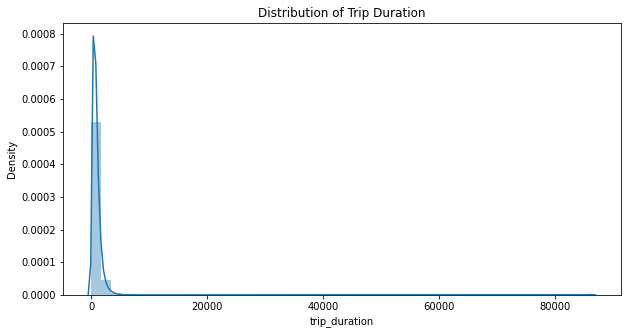

In [68]:
#Checking the distribution of trip_duration again after removing the outliers.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(nyc_taxi_dataset['trip_duration'])
plt.show()

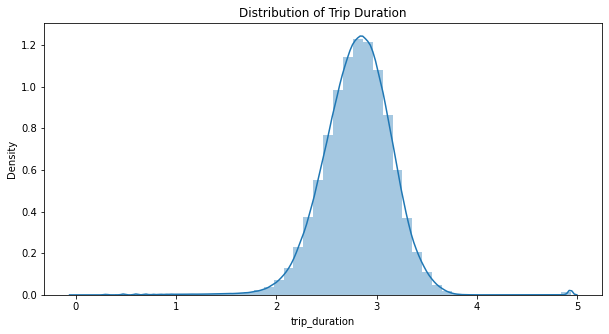

In [70]:
#Checking the distribution of trip_duration again after taking log of the data.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(np.log10(nyc_taxi_dataset['trip_duration']))
plt.show()

The log transformation has improved the skewness of the dependent variable trip_duration.

#### **Exploring store_and_fwd_flag column**

In [72]:
#Checking the number of store and forward trips.
nyc_taxi_dataset['store_and_fwd_flag'].value_counts()

N    1450537
Y       8042
Name: store_and_fwd_flag, dtype: int64

The above data shows that 8042 trips record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server. The major reason might be that the trip was done for outstation where network was not good or the driver doesn't have proper network strength to share the data real time to the server.

In [74]:
#Exploring the dataset more where store_and_fwd_flag is 'Y'.
nyc_taxi_dataset[nyc_taxi_dataset['store_and_fwd_flag'] == 'Y']

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
348,id1633648,1,2016-06-20 14:19:16,2016-06-20 14:34:34,1,-73.977905,40.754871,-73.952774,40.768166,Y,918,Monday,Monday,14,14,Afternoon,Afternoon,2.585050
491,id2042535,1,2016-02-12 12:36:38,2016-02-12 12:47:07,1,-73.978981,40.756519,-73.992165,40.749203,Y,629,Friday,Friday,12,12,Afternoon,Afternoon,1.378288
610,id0909228,1,2016-05-08 15:02:28,2016-05-08 15:17:54,1,-73.988510,40.742935,-74.010620,40.723507,Y,926,Sunday,Sunday,15,15,Afternoon,Afternoon,2.853606
774,id3697489,1,2016-01-13 13:53:29,2016-01-13 14:08:21,1,-73.948982,40.781578,-73.982346,40.778923,Y,892,Wednesday,Wednesday,13,14,Afternoon,Afternoon,2.831724
846,id1026973,1,2016-06-25 21:53:30,2016-06-25 22:05:27,1,-73.982628,40.762341,-73.995537,40.749779,Y,717,Saturday,Saturday,21,22,Evening,Night,1.770384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457491,id2229555,1,2016-01-22 19:05:50,2016-01-22 19:27:09,1,-73.874535,40.774082,-73.925362,40.732521,Y,1279,Friday,Friday,19,19,Evening,Evening,6.302747
1457605,id0510811,1,2016-04-07 21:14:30,2016-04-07 21:51:38,1,-73.781944,40.644760,-73.976173,40.670235,Y,2228,Thursday,Thursday,21,21,Evening,Evening,16.667616
1457832,id3209015,1,2016-03-20 18:49:55,2016-03-20 19:09:25,1,-73.990097,40.714352,-74.002579,40.750145,Y,1170,Sunday,Sunday,18,19,Evening,Evening,4.112272
1457995,id1371896,1,2016-03-28 11:45:49,2016-03-28 12:21:45,1,-73.971008,40.759079,-74.010025,40.720810,Y,2156,Monday,Monday,11,12,Morning,Afternoon,5.377813


In this data we can see that these trips are done by vendor 1 let's check if these trips are done by only vendor 1 or vendor 2 is also there.

In [75]:
#Checking which vendor_id has store_and_fwd_flag as 'Y'
nyc_taxi_dataset[nyc_taxi_dataset['store_and_fwd_flag'] == 'Y']['vendor_id'].value_counts()

1    8042
Name: vendor_id, dtype: int64

From this we can infer that all the store_and_fwd_flag trips are done by vendor 1. So, vendor 1 has to work on its connectivity to the server so that it can share the data in realtime to the server.

### **Bivariate Analysis**

We will first explore all the features with respect to Trip Duration as it is the target variable.

#### **Trip duration vs Vendor ID**

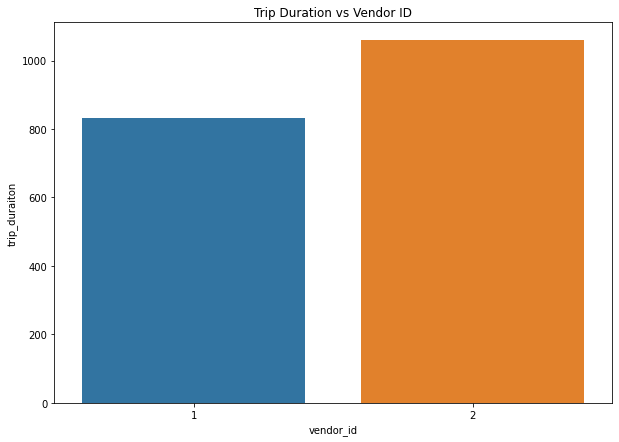

In [76]:
#Plotting Trip Duration vs Vendor ID.
trip_vendor_dataset = nyc_taxi_dataset.groupby(['vendor_id'])['trip_duration'].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration vs Vendor ID")
sns.barplot(x = 'vendor_id', y = 'trip_duration', data = trip_vendor_dataset)
plt.xlabel("vendor_id")
plt.ylabel("trip_duraiton")
plt.show()

The above barplot helps in visualizing the difference in the trip_duration between the vendor_id 1 & 2.

The above graph shows that average trip duration for vendor 2 is higher than vendor 1 by approx 200sec. This means, on an average vendor 2 takes 200sec(or 3mins) more than vendor 1 per trip.

#### **Trip Duration per Hour**

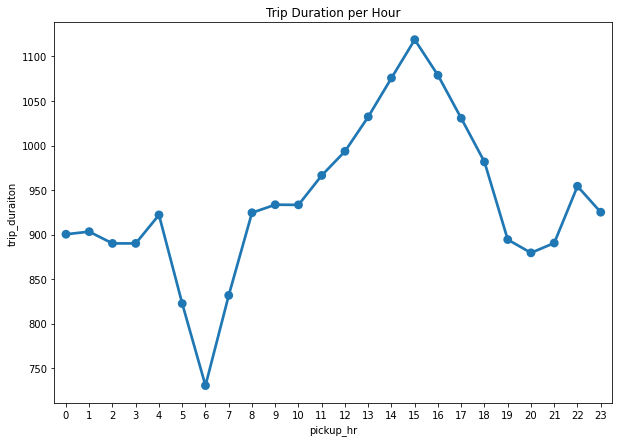

In [79]:
#Plotting Trip Duration per Hour.
trip_hr_df = nyc_taxi_dataset.groupby(['pickup_hour'])['trip_duration'].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration per Hour")
sns.pointplot(x = 'pickup_hour', y = 'trip_duration', data = trip_hr_df)
plt.xlabel("pickup_hr")
plt.ylabel("trip_duraiton")
plt.show()

The pointplot shows a very good visualization for the variation in trip_duration based upon different pickup_hr.

From the above graph we can infer that -
* Average trip_duration is highest at 3:00 PM so, at this time the traffic is more.
* At morning 6:00 AM there is lowest traffic and thus the trip_duration is also very less at that time. 
* Traffic starts increasing after 6:00AM as more and more people starts going out for work, schools, vacation etc.
* Traffic starts decreasing after 3:00 PM as people starts coming to their home.
* Between 7:00 PM to 9:00 PM and 12:00AM to 4:00AM there is average traffic.

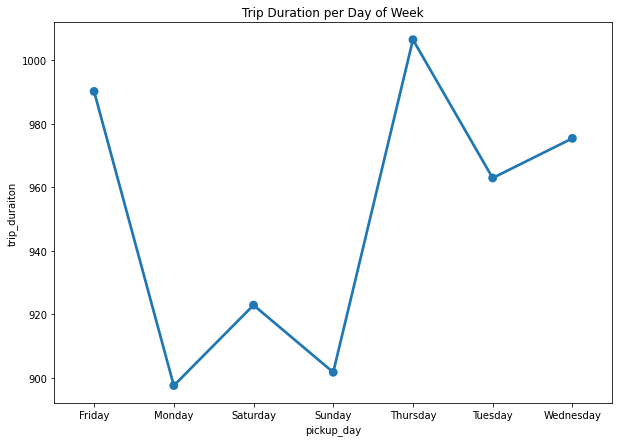

In [80]:
#Plotting Trip Duration per Day of Week.
trip_day_df = nyc_taxi_dataset.groupby(['pickup_day'])[['trip_duration']].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration per Day of Week")
sns.pointplot(x = 'pickup_day', y = 'trip_duration', data = trip_day_df)
plt.xlabel("pickup_day")
plt.ylabel("trip_duraiton")
plt.show()

The pointplot shows a very good visualization for the variation in trip_duration based upon different pickup_day of week.

The above graph shows that average trip duration is less on Saturday, Sunday and Monday and it increases drastically on Tuesday, Wednessday and Thursday, having highest average trip duration on Thursday.

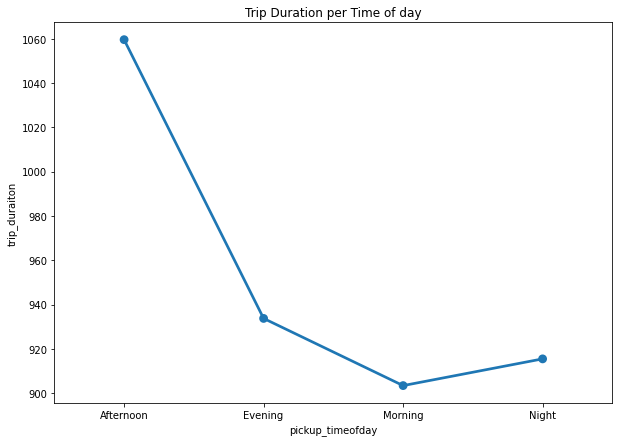

In [81]:
#Plotting Trip Duration per Time of Week.
trip_timeday_df = nyc_taxi_dataset.groupby(['pickup_timeofday'])[['trip_duration']].mean().reset_index()
plt.figure(figsize=(10,7))
plt.title("Trip Duration per Time of day")
sns.pointplot(x = 'pickup_timeofday', y = 'trip_duration', data = trip_timeday_df)
plt.xlabel("pickup_timeofday")
plt.ylabel("trip_duraiton")
plt.show()

The pointplot shows a very good visualization for the variation in trip_duration with pickup_timeofday.

This graph also shows that the average trip duration is most in the afternoon lowest in the morning and average in the evening and night. 

#### **Trip Duration vs Distance**

In [88]:
#Function for plotting trip_duration vs Distance
def trip_duration_vs_distance():
  '''This function will do a scatter plot for trip_duration vs distance.'''
  plt.figure(figsize=(10,7))
  plt.title("Trip Duration vs Distance")
  sns.scatterplot(x = 'distance', y = 'trip_duration', data = nyc_taxi_dataset)
  plt.xlabel("Distance in km")
  plt.ylabel("Trip Duration in sec")
  plt.show()

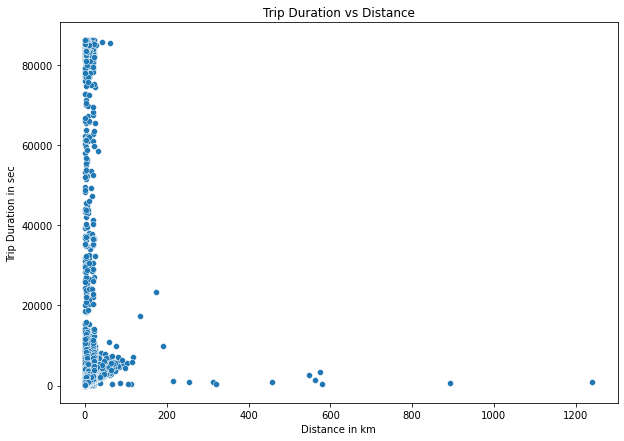

In [89]:
trip_duration_vs_distance()

The scatter plot shows a better visualization of how trip_duration is related to distance.

From the above graph we can notice majorly two points - 


1.   There are some data where more than 200kms of distance are covered within a very short time which is not possible.
2.   For some of the data distance covered is quite low still the trip duration is more than 20000 secs (>5hrs) this also shows that there is some ambiguity in the data.

Let's clear the above two outliers one by one. 
First we will be clearing the outliers in which quite a huge distance is covered in negligible timing. For doing this lets calculate the speed for each trip in km/hr.

In [90]:
#Function for calculating the speed for each trip in km/hr
def get_speed(dis_in_km, time_in_sec):
  ''' This function returns the speed'''
  speed = dis_in_km/(time_in_sec/3600)
  return speed


In [99]:
#Adding a new column speed which contains the speed for each trip
nyc_taxi_dataset['speed'] = nyc_taxi_dataset.apply(lambda x: get_speed(x['distance'],x['trip_duration']), axis = 1)

In [100]:
#Sorting the dataset in ascending order wrt speed and checking the head to see what is the max speed in the dataset.
nyc_taxi_dataset.sort_values(by = 'speed', ascending = False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance,speed
1176287,id3619353,2,2016-02-13 20:28:30,2016-02-13 20:28:37,1,-73.936974,40.764610,-73.789848,40.646858,N,7,Saturday,Saturday,20,20,Evening,Evening,18.043631,9279.581773
910037,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,Monday,Monday,18,19,Evening,Evening,578.579744,6874.214785
184923,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,Saturday,Saturday,18,19,Evening,Evening,1240.510256,5638.682980
974337,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,Wednesday,Wednesday,20,20,Evening,Evening,891.663777,5253.665463
377058,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,Saturday,Saturday,20,20,Evening,Evening,320.445202,4090.789812


From the data we can see that there are entries with speed more than 1000km/hr also which clearly shows that these are wrong entries as the max speed allowed in nyc is 55miles/hr (= 88.5km/hr).
This speed data is taken from following site - 
https://www.newyorksafetycouncil.com/articles/speed-limits-in-new-york/

In this article it is mentioned - 
You must obey the posted speed limit or, if no limit is posted, drive no faster than 55 mph. Be aware, however, that some cities in New York have speed limits lower than 55 mph that may not be posted. For example, the speed limit is 25 mph in New York City unless another limit is posted.

For our dataset let's keep only those data where the speed is max 100km/hr.

In [101]:
#Taking only those entries where the speed <= 100km/hr.
nyc_taxi_dataset = nyc_taxi_dataset[nyc_taxi_dataset['speed'] <= 100.0]
nyc_taxi_dataset.shape

(1458406, 19)

Plotting the scatter plot again for trip_duration vs distance afer clearing the outliers.

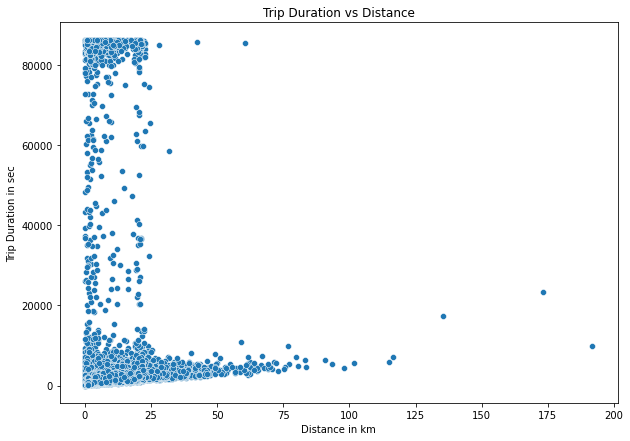

In [102]:
trip_duration_vs_distance()

Now lets take the case where distance covered is quite less but the trip duration is considerably high.

First let's remove those outliers where distance covered is 0.0km still trip_duration is more than 1 min or 60secs.

In [106]:
#Removing the entries where distance is 0.0km and duration is more than 1 min. 
nyc_taxi_dataset = nyc_taxi_dataset[~((nyc_taxi_dataset['distance'] == 0.0) & (nyc_taxi_dataset['trip_duration']>=60))]
nyc_taxi_dataset.shape

(1453742, 19)

Also, we will remove the entries where the distance is less than 1km but trip duration is more than one hour as it is quite obvious that in 1hr the distance covered will be surely more than 1km.

In [107]:
#Removing the entries where distance is less than 1.0km and duration is more than 1hr (or 3600 sec). 
nyc_taxi_dataset = nyc_taxi_dataset[~((nyc_taxi_dataset['distance'] <= 1.0) & (nyc_taxi_dataset['trip_duration']>=3600))]
nyc_taxi_dataset.shape

(1453742, 19)

Let's delete some more outliers where distance covered is less than 75km but trip_duraiton is more than 30000secs (~ 8hrs). As, it is quite obvious whatever the situation might be if the trip is going with 10km/hr speed also then in 8hrs we are expected to cover 80km but the current data shows there are some entries where the speed is much lesser than that which clearly shows that those are outliers.

In [108]:
nyc_taxi_dataset = nyc_taxi_dataset[~((nyc_taxi_dataset['distance'] <= 75.0) & (nyc_taxi_dataset['trip_duration']>=30000))]
nyc_taxi_dataset.shape

(1452017, 19)

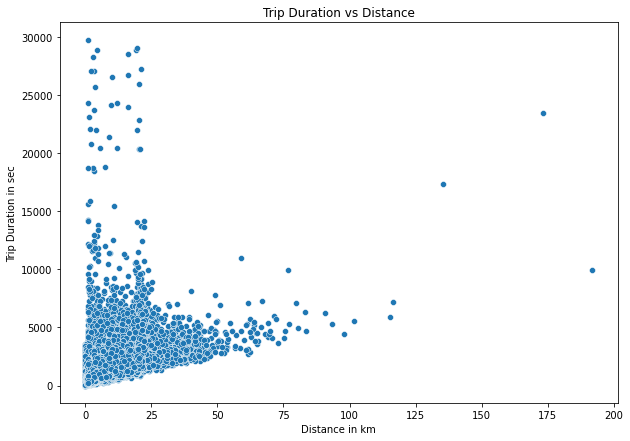

In [109]:
trip_duration_vs_distance()

The above graph shows the relationship between trip_duration and distance after removing the outliers.

#### **Pickup and Dropoff Latitude and Longitude Plots**

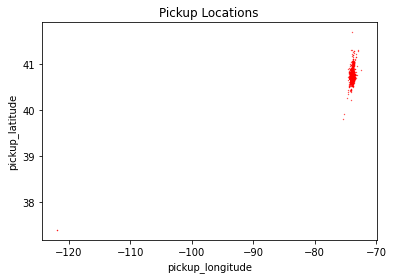

In [111]:
#Plotting the pickup latitude and longitude.
nyc_taxi_dataset.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude', color='red', s=0.1, alpha =1)
plt.title('Pickup Locations')
plt.xlabel("pickup_longitude")
plt.ylabel("pickup_latitude")
plt.show()

Scatter plot is used to show latitude and longitude plots as this will give the pin point location of the pickup or the dropoff locations.

Above graph shows that one of the location is very far away from the usual operating zone this might be entered due to some error. Let's remove this outlier.

In [116]:
#Removing the pickup location which is very far away from the other pickup locations.
nyc_taxi_dataset = nyc_taxi_dataset[nyc_taxi_dataset['pickup_longitude']>-100.0]

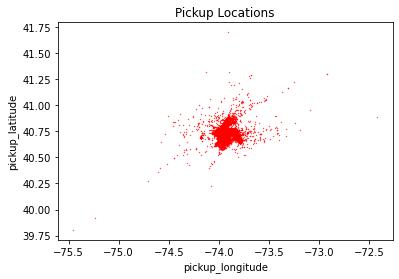

In [117]:
#Plotting the pickup latitude and longitude again after removing the outlier.
nyc_taxi_dataset.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude', color='red', s=0.1, alpha =1)
plt.title('Pickup Locations')
plt.xlabel("pickup_longitude")
plt.ylabel("pickup_latitude")
plt.show()

Let's view the concentrated area of the map.

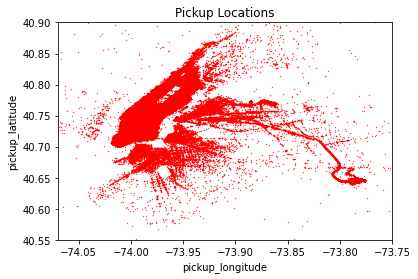

In [118]:
#Plotting the pickup latitude and longitude at the concentrated area of the map.
nyc_taxi_dataset.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude', color='red', s=0.1, alpha =1)
plt.title('Pickup Locations')
plt.xlabel("pickup_longitude")
plt.ylabel("pickup_latitude")
plt.ylim([40.55,40.9])
plt.xlim([-74.07,-73.75])
plt.show()

Now lets look at the dropoff latitude and longitude.

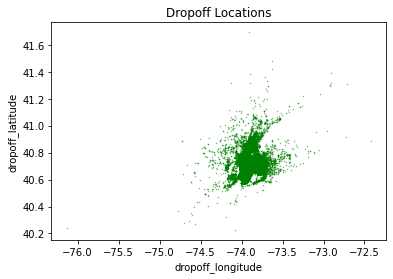

In [119]:
#Plotting the dropoff latitude and longitude.
nyc_taxi_dataset.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',color='green',s=0.2, alpha =.6)
plt.title('Dropoff Locations')
plt.xlabel("dropoff_longitude")
plt.ylabel("dropoff_latitude")
plt.show()

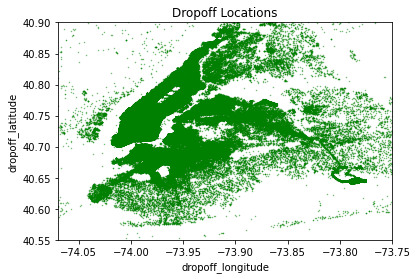

In [120]:
#Plotting the dropoff concentrated region.
nyc_taxi_dataset.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',color='green',s=0.2, alpha =.6)
plt.title('Dropoff Locations')
plt.xlabel("dropoff_longitude")
plt.ylabel("dropoff_latitude")
plt.ylim([40.55,40.9])
plt.xlim([-74.07,-73.75])
plt.show()

From the pickup and dropoff plots we can infer that dropoff locations are more distributed than the pickup locations.

In [122]:
nyc_taxi_dataset.shape

(1452015, 19)

We have removed all the outliers to the best of our knowledge.
Our initial dataset was having 1458644 entries and after removing the outliers we are having 1452015 entries. So, still we have 99.5% of the data for making the model.

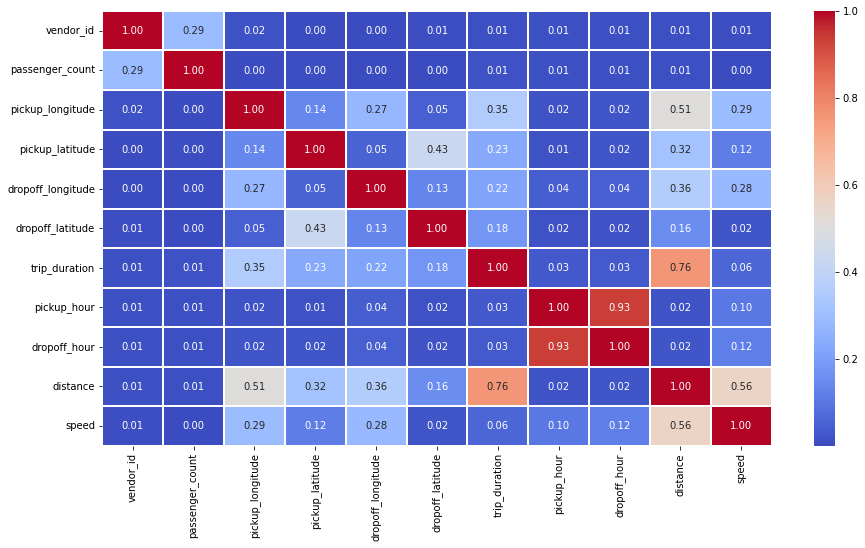

In [123]:
## Plotting Correlation HeatMap
plt.figure(figsize=(15,8))
correlation = nyc_taxi_dataset.corr()
sns.heatmap(abs(correlation), annot=True, linewidths = 0.1, fmt = '0.2f', cmap='coolwarm')
plt.show()

Heatmaps are the best way to visualize the correlation between the features.

* Pickup_hr and dropoff_hr are showing high correlation. We will be dropping dropoff hr from the dataset.
* Speed and distance is also showing correlation we will be dropping speed from the dataset.

We will be using VIF to remove the highly correlated features from the dataset.